<a href="https://colab.research.google.com/github/Wnjoki/Data-Science-Exercises/blob/main/Word2Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vector


In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reading the data
url = "https://raw.githubusercontent.com/Wnjoki/Data-Science-Exercises/main/Reviews.csv"
ReviewData=pd.read_csv(url)

# Printing number of rows and columns
print(ReviewData.shape)

# Printing sample rows
ReviewData = ReviewData.fillna("negative")
ReviewData.head()


(20, 2)


,Review,Remark
0,"We came there after long trip, our room was no...",positive
1,Overall the stay was absolutely fantastic. The...,positive
2,The reception needs to have better communicati...,negative
3,My family and I had an excellent vacation. The...,positive
4,Sarova Lion Hill is a great place to be especi...,positive


In [53]:
#Count Vectorization: converting text data to numeric
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Review Data
corpus = ReviewData['Review'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)


# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

CountVectorizedData['Priority']=ReviewData['Remark']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(20, 234)


,absolutely,accommodative,activities,affordable,agreed,amazing,amenities,angela,apart,ask,...,water,way,week,welcoming,wet,wish,wonderful,work,yummy,Priority
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,positive
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,positive


In [3]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [4]:
import gensim

In [5]:
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz',binary=True)

In [6]:
# Each word is a vector of 300 numbers
GoogleModel['hello'].shape

(300,)

In [54]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]

# Printing sample words
WordsVocab[0:10]

Index(['absolutely', 'accommodative', 'activities', 'affordable', 'agreed',
       'amazing', 'amenities', 'angela', 'apart', 'ask'],
      dtype='object')

In [8]:
#Converting every sentence to a numeric vector

In [55]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Creating empty dataframe to hold sentences
    W2Vectorized_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vectorized_Data=W2Vectorized_Data.append(pd.DataFrame([Sentence]))
    return(W2Vectorized_Data)




In [56]:

# Calling the function to convert all the text data to Word2Vec Vectors
W2Vectorized_Data=FunctionText2Vec(ReviewData['Review'])

# Checking the new representation for sentences
W2Vectorized_Data.shape


(20, 300)

In [57]:
# Comparing the above with the document term matrix
CountVectorizedData.shape

(20, 234)

In [58]:
# Adding the target variable
W2Vectorized_Data.reset_index(inplace=True, drop=True)
W2Vectorized_Data['Priority']=CountVectorizedData['Priority']
 
# Assigning to DataForML variable
DataForML=W2Vectorized_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Priority
0,0.529877,3.239471,-0.379150,1.614044,-0.756713,-0.675507,2.520691,-4.141632,1.584503,1.712891,...,1.087219,-1.624390,1.080994,-0.737869,-1.442684,0.537651,-1.323044,0.231056,-0.334259,positive
1,-0.600555,-0.452728,-0.437073,1.315857,-0.386292,0.640381,0.426559,-2.395020,0.903564,1.460815,...,1.060730,-1.166321,1.315598,-0.098389,-1.314862,0.169189,-0.893814,0.661682,0.056274,positive
2,0.595642,1.098122,0.435883,-0.044922,-1.729797,-0.273499,1.323853,-0.905151,1.119141,1.315407,...,1.584747,-1.253296,0.772301,-0.874268,-0.866882,-0.790558,-2.202759,0.846622,0.323730,negative
3,-0.787994,1.716743,-0.494690,3.949081,-0.417206,0.738953,1.802982,-3.606323,-0.136078,1.728027,...,0.650673,-5.128418,1.229686,-0.146019,-0.733063,1.529938,-1.943909,1.387665,0.071991,positive
4,-0.749420,3.461525,0.424088,5.560516,-1.320006,-1.427124,2.296112,-2.501915,-0.003929,3.802017,...,3.223572,-5.642334,-0.626343,-0.174942,-1.130066,2.113075,-1.745575,0.231110,-0.586029,positive


In [59]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14, 300)
(14,)
(6, 300)
(6,)


In [63]:
#Standardization/Normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()

# fit the data
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14, 300)
(14,)
(6, 300)
(6,)


# **Training ML classification models**

In [64]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
#clf = GaussianNB()
clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

MultinomialNB()
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    negative       0.00      0.00      0.00         2
    positive       0.60      0.75      0.67         4

    accuracy                           0.50         6
   macro avg       0.20      0.25      0.22         6
weighted avg       0.40      0.50      0.44         6

[[0 0 0]
 [0 0 2]
 [1 0 3]]
Accuracy of the model on Testing Sample Data: 0.44

Accuracy values for 5-fold Cross Validation:
 [0.375      0.5        0.76666667 0.5        0.45833333]

Final Average Accuracy of the model: 0.52


In [65]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=14)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=14)
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

[[0 2]
 [0 4]]
Accuracy of the model on Testing Sample Data: 0.53


In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Survived']=y_test
TestingData['Predicted_Survived']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

## Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

## Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

## Running 10-Fold Cross validation on a given algorithm
## Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

          0         1         2         3         4         5         6  \
0  0.834338  0.943271  0.328678  0.295957  0.502134  0.334057  1.000000   
1  0.747213  0.386107  0.867013  0.274479  0.582825  0.739444  0.365601   
2  0.184907  0.277689  0.495856  0.143555  0.616400  0.672834  0.218817   
3  0.131987  0.000000  0.297745  0.242760  0.693280  0.918904  0.316243   
4  0.033068  0.370280  0.000000  0.371213  0.350483  1.000000  0.510174   

          7         8         9  ...       292       293       294       295  \
0  0.000000  1.000000  0.461585  ...  0.661954  0.879191  0.121337  0.000000   
1  0.696792  0.165954  0.387111  ...  0.855874  0.952957  0.774477  0.353206   
2  0.781324  0.459161  0.143742  ...  0.858298  0.636331  0.413045  0.740349   
3  0.373752  0.628193  0.396620  ...  0.737421  1.000000  0.424113  0.050368   
4  0.783097  0.317190  0.560913  ...  0.642507  0.483189  0.963241  0.922028   

        296       297       298       299  Survived  Predicted_Survi

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
    negative       0.00      0.00      0.00         2
    positive       0.50      0.50      0.50         4

    accuracy                           0.33         6
   macro avg       0.17      0.17      0.17         6
weighted avg       0.33      0.33      0.33         6

[[0 0 0]
 [0 0 2]
 [1 1 2]]
Accuracy of the model on Testing Sample Data: 0.33


<Axes: >

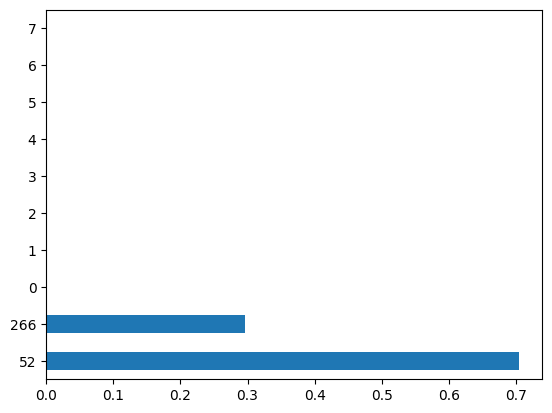

In [67]:
# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [68]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
#%matplotlib inline
#feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.60      0.75      0.67         4

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6

[[0 2]
 [1 3]]
Accuracy of the model on Testing Sample Data: 0.44
